 # <h1 style='background:#00B0F0; border:0; color:black'><center>Preisvorhersage von Diamanten: Regression Modellen</center></h1> 
   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 style='background:#00B0F0; border:0; color:black'><center>INDEX</center></h1>

[1. BIBLIOTHEKEN IMPORTIEREN](#1)     
[2. LADEDATEN](#2)    
[3. DATENVORVERARBEITUNG](#3)     
[4. MODEL ERSTELLUNG UND TESTEN](#4)     
[5. ENDE](#5)

<a id="1"></a>
<h1 style='background:#00B0F0; border:0; color:black'><center>BIBLIOTHEKEN IMPORTIEREN</center></h1> 

# Bibliotheken Importieren

In [11]:
# All the libralies used in this project

# General Libraries
import pathlib
import numpy as np 
import pandas as pd 

# Visualisation Libraries
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab


from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn import preprocessing

import statsmodels.api as sm
import pylab as py
import scipy.stats as stats
import statistics as st

from matplotlib.ticker import PercentFormatter

#Modelling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

from sklearn import tree

<a id="2"></a>
<h1 style='background:#00B0F0; border:0; color:black'><center>LOADING DATA</center></h1> 

# Data

This dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price.

Feature description:

price<br>
price in US dollars ($326 -- $18,823)This is the target column containing tags for the features. 

The 4 Cs of Diamonds:-

carat (0.2--5.01) The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs. 

cut (Fair, Good, Very Good, Premium, Ideal) In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.  

color, from J (worst) to D (best) The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.  

clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.  

**Dimensions**

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

<img src="Diamonds.jpg">

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79) The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface).

table width of the top of the diamond relative to widest point (43--95)

A diamond's table refers to the flat facet of the diamond seen when the stone is face up. The main purpose of a diamond table is to refract entering light rays and allow reflected light rays from within the diamond to meet the observer’s eye. The ideal table cut diamond will give the diamond stunning fire and brilliance.

<a id="3"></a>
 <h2 style='background:#00B0F0; border:0; color:black'><center>DATA VORBEREITUNG</center></h2> 
######Data Preprocessing
**Steps involved in Data Preprocessing**

<ul>
  <li>Data cleaning</li>
  <li>Identifying and removing outliers</li>
  <li>Encoding categorical variables</li>
</ul> 

In [52]:
df_diamond = pd.read_csv('diamonds.csv', delimiter=',')

In [53]:
df_diamond

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      4.23  2.63  
4      4.35  2.75  
...     ...   ...  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64  

[53940 rows x 11 columns]

In [54]:
df_diamond = df_diamond.drop(["Unnamed: 0"], axis = 1)

In [55]:
df_diamond.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [56]:
df_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [57]:
df_diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [58]:
df_diamond.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [59]:
df_diamond.loc[df_diamond.duplicated() == True]

carat    cut color clarity  depth  table  price     x     y     z
1005    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1006    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1007    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1008    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
2025    1.52   Good     E      I1   57.3   58.0   3105  7.53  7.42  4.28
...      ...    ...   ...     ...    ...    ...    ...   ...   ...   ...
47969   0.52  Ideal     D     VS2   61.8   55.0   1919  5.19  5.16  3.20
49326   0.51  Ideal     F    VVS2   61.2   56.0   2093  5.17  5.19  3.17
49557   0.71   Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.00
50079   0.51  Ideal     F    VVS2   61.2   56.0   2203  5.19  5.17  3.17
52861   0.50   Fair     E     VS2   79.0   73.0   2579  5.21  5.18  4.09

[146 rows x 10 columns]

In [60]:
df_diamond.drop_duplicates(keep="first", inplace=True) #.reset_index(inplace=True, drop=True)
df_diamond.reset_index(inplace=True, drop=True)

In [61]:
df_diamond.loc[df_diamond.duplicated() == True]

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []

In [62]:
df_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53794 entries, 0 to 53793
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [63]:
# Finding dimentionless diamonds
df_diamond.loc[(df_diamond.x == 0) | (df_diamond.y == 0) | (df_diamond.z == 0), :]

carat        cut color clarity  depth  table  price     x     y    z
2201    1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48  0.0
2308    1.01    Premium     H      I1   58.1   59.0   3167  6.66  6.60  0.0
4778    1.10    Premium     G     SI2   63.0   59.0   3696  6.50  6.47  0.0
5457    1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47  0.0
10145   1.50       Good     G      I1   64.0   61.0   4731  7.15  7.04  0.0
11156   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00  6.62  0.0
11935   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00  0.00  0.0
13570   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83  0.0
15914   1.14       Fair     G     VS1   57.5   67.0   6381  0.00  0.00  0.0
24338   2.18    Premium     H     SI2   59.4   61.0  12631  8.49  8.45  0.0
24464   1.56      Ideal     G     VS2   62.2   54.0  12800  0.00  0.00  0.0
26063   2.25    Premium     I     SI1   61.3   58.0  15397  8.52  8.42  0.0
26183   1.20    Premium     D    VVS1   62.1   59.0  15686  0.00  0.00  0.0
27047   2.20    Premium     H     SI1   61.2   59.0  17265  8.42  8.37  0.0
27364   2.25    Premium     H     SI2   62.8   59.0  18034  0.00  0.00  0.0
27438   2.02    Premium     H     VS2   62.7   53.0  18207  8.02  7.95  0.0
27672   2.80       Good     G     SI2   63.8   58.0  18788  8.90  8.85  0.0
49413   0.71       Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.0
51361   1.12    Premium     G      I1   60.4   59.0   2383  6.71  6.67  0.0

In [64]:
#Dropping dimentionless diamonds
df_diamond = df_diamond.drop(df_diamond[df_diamond["x"]==0].index)
df_diamond = df_diamond.drop(df_diamond[df_diamond["y"]==0].index)
df_diamond = df_diamond.drop(df_diamond[df_diamond["z"]==0].index)
df_diamond.reset_index(drop=True)
df_diamond.shape

(53775, 10)

In [65]:
# Checking dimentionless diamonds
df_diamond.loc[(df_diamond.x == 0) | (df_diamond.y == 0) | (df_diamond.z == 0), :]

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []

In [66]:
df_diamond.describe()

carat         depth         table         price             x  \
count  53775.000000  53775.000000  53775.000000  53775.000000  53775.000000   
mean       0.797536     61.748232     57.457806   3931.220288      5.731579   
std        0.473169      1.429639      2.233257   3985.918716      1.118611   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    951.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.000000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53775.000000  53775.000000  
mean       5.734909      3.539964  
std        1.139451      0.702017  
min        3.680000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.030000  
max       58.900000     31.800000

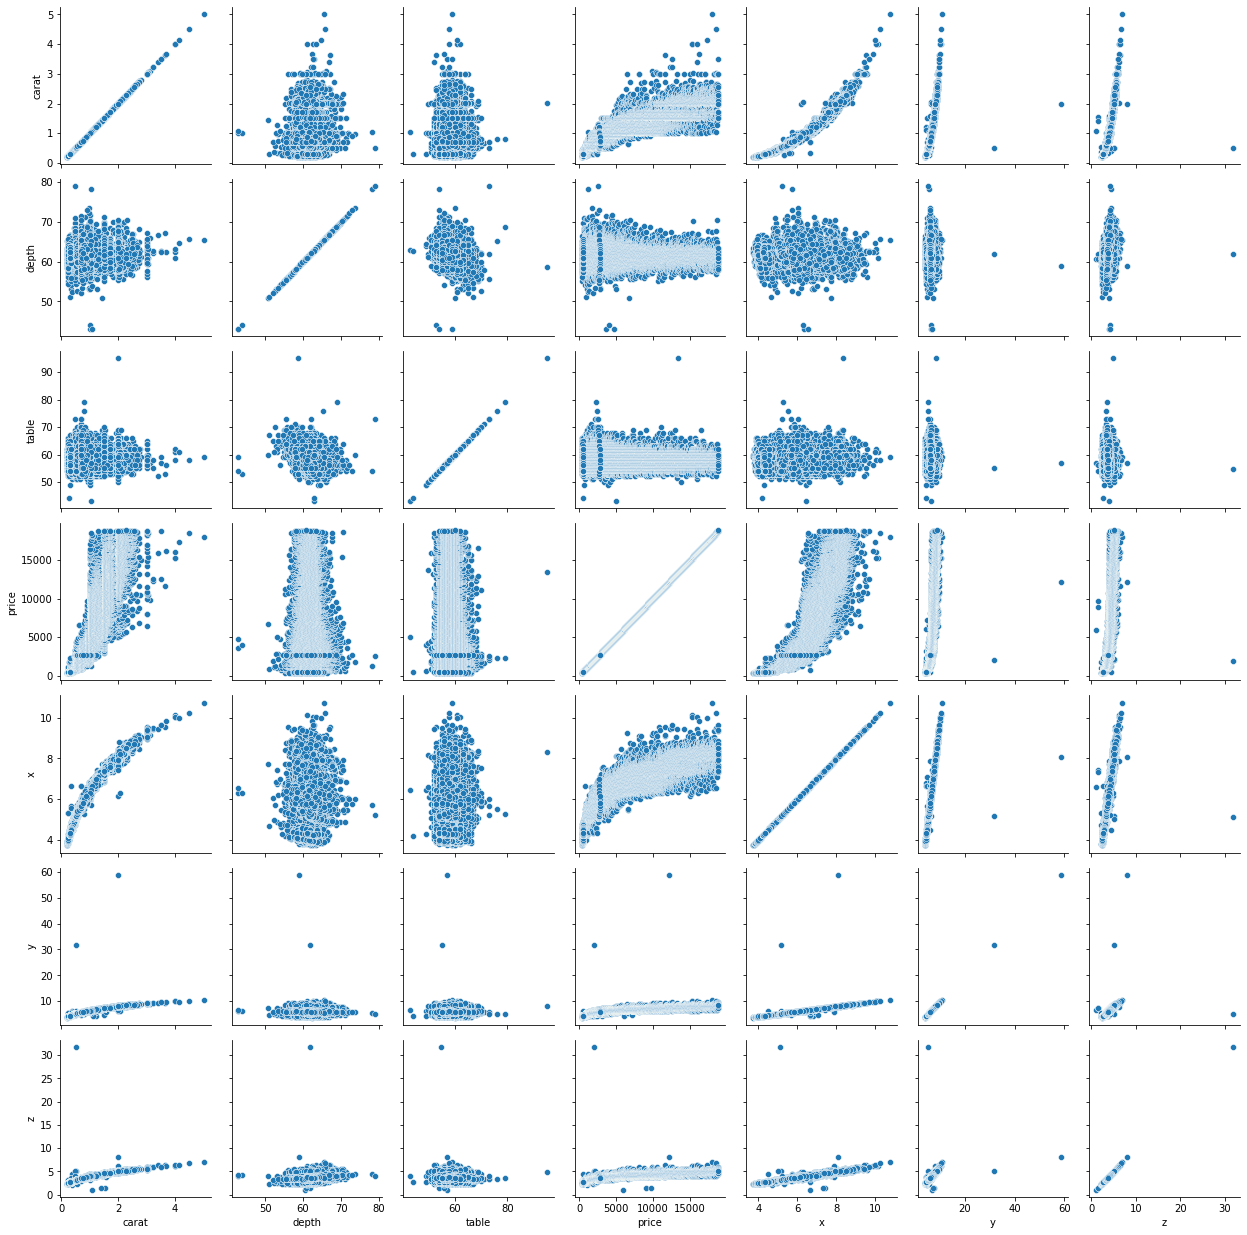

In [67]:
g = sns.PairGrid(df_diamond)
g.map(sns.scatterplot)

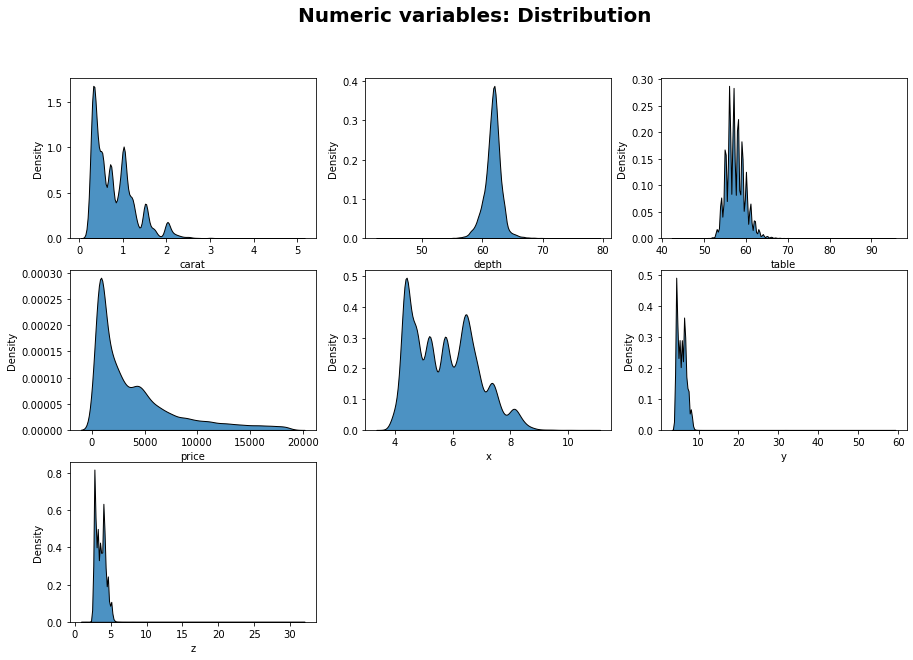

In [68]:
## Data distribution analysis

#Review of numeric and categorical data distibutions and boxplots to visualize outliers.

# plot distribution of numeric variables

int_cols = df_diamond.select_dtypes(exclude='object').columns.to_list() #choose all but object columns

j=0
fig=plt.figure(figsize=(15,10))
plt.suptitle("Numeric variables: Distribution", size=20, weight='bold')

for i in int_cols:
    ax=plt.subplot(331+j)
    ax=sns.kdeplot(data=df_diamond, x=i, fill=True, edgecolor="black", alpha=0.8)
    j=j+1

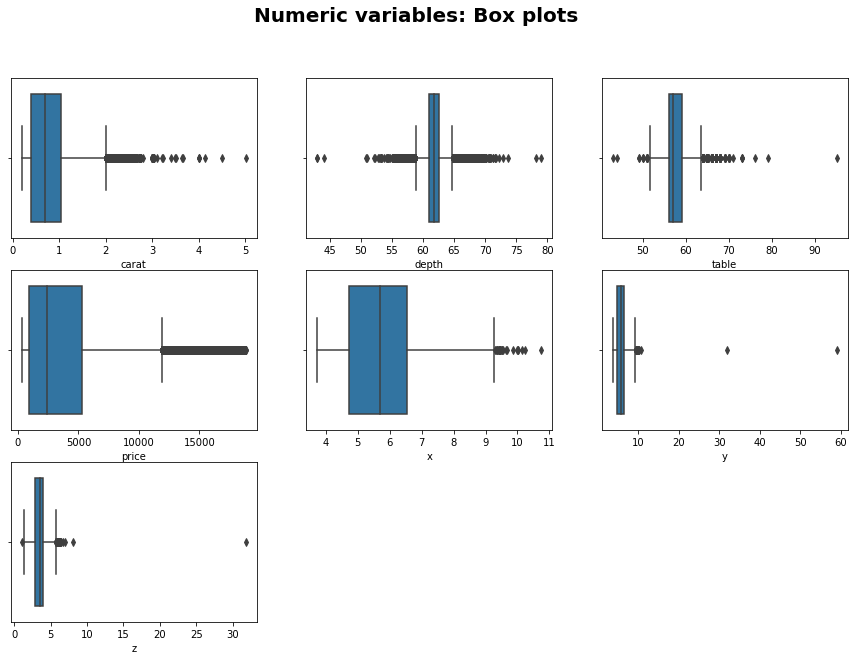

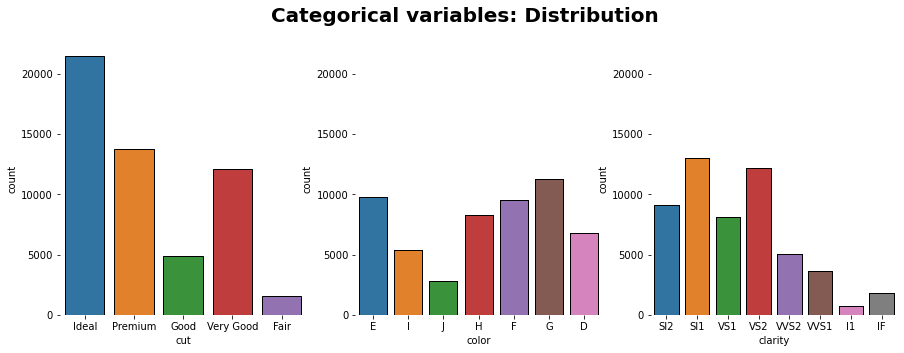

In [69]:
# plot boxplot of numeric variables to visualize outliers

fig=plt.figure(figsize=(15,10))
plt.suptitle("Numeric variables: Box plots", size=20, weight='bold')

j=0
for i in int_cols:
    ax=plt.subplot(331+j)
    ax=sns.boxplot(data=df_diamond, x=i)
    j=j+1

# visualize distribution of categorical variables
cat_cols=df_diamond.select_dtypes(include='object').columns.to_list()

fig=plt.figure(figsize=(15,5))
plt.suptitle("Categorical variables: Distribution", size=20, weight='bold')
ax1=plt.subplot(131)
sns.countplot(data=df_diamond, x=cat_cols[0], ax=ax1, edgecolor="black")
for s in ['left','right','top','bottom']:
    ax1.spines[s].set_visible(False)
    ax2=plt.subplot(132, sharey=ax1)
    sns.countplot(data=df_diamond, x=cat_cols[1], ax=ax2, edgecolor="black")
for s in ['left','right','top','bottom']:
    ax2.spines[s].set_visible(False)
    ax3=plt.subplot(133, sharey=ax1)
    sns.countplot(data=df_diamond, x=cat_cols[2], ax=ax3, edgecolor="black")
for s in ['left','right','top','bottom']:
    ax3.spines[s].set_visible(False)

C:\Users\Lenovo Pc\AppData\Local\Temp\ipykernel_28548\698727057.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_diamond_wo_outliers=df_diamond[~((df_diamond<(Q1-1.5*IQR))|(df_diamond>(Q3+1.5*IQR))).any(axis=1)]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 47412 entries, 0 to 53793
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    47412 non-null  float64
 1   cut      47412 non-null  object 
 2   color    47412 non-null  object 
 3   clarity  47412 non-null  object 
 4   depth    47412 non-null  float64
 5   table    47412 non-null  float64
 6   price    47412 non-null  int64  
 7   x        47412 non-null  float64
 8   y        47412 non-null  float64
 9   z        47412 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.0+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53775 entries, 0 to 53793
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53775 non-null  float64
 1   cut      53775 non-null  object 
 2   color    53775 non-null  object 
 3   clarity  53775 non-null  object 
 4   depth    53775 non-null  float6

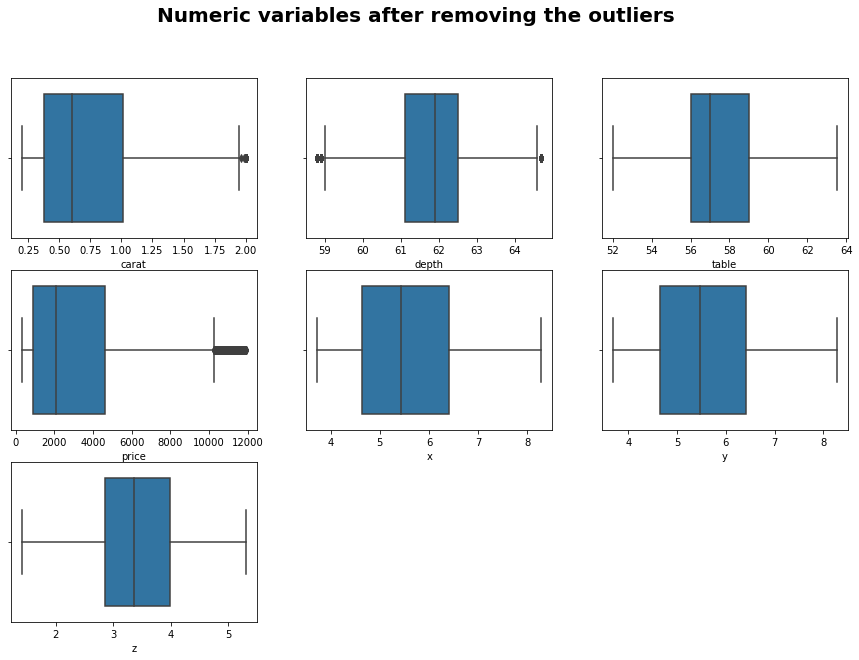

In [70]:
## Outliers
#According to IQR method, outliers are defined by IQR (distance between Q1 and Q3). To build the fence between outliers and non outliers, we take 1.5 times the IQR and then subtract this value from Q1 and add this value to Q3. This gives us the minimum and maximum fence posts that we compare each observation to. Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers.
#If we use the IQR method on our diamond dataset, we remove ca. 12% of our data.

import scipy.stats as st

Q1 = df_diamond.quantile(0.25)
Q3 = df_diamond.quantile(0.75)
IQR=Q3-Q1
df_diamond_wo_outliers=df_diamond[~((df_diamond<(Q1-1.5*IQR))|(df_diamond>(Q3+1.5*IQR))).any(axis=1)]

int_cols=df_diamond_wo_outliers.select_dtypes(exclude='object').columns.to_list()
j=0
fig=plt.figure(figsize=(15,10))
plt.suptitle("Numeric variables after removing the outliers", size=20, weight='bold')

for i in int_cols:
    ax=plt.subplot(331+j)
    ax=sns.boxplot(data=df_diamond_wo_outliers, x=i)
    j=j+1

df_diamond_wo_outliers.info()
df_diamond.info()

0.26582890285161914

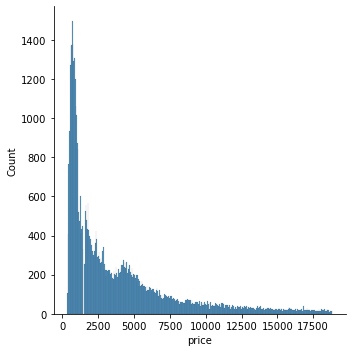

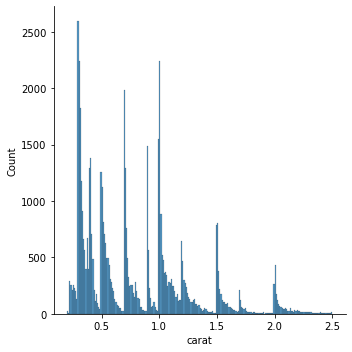

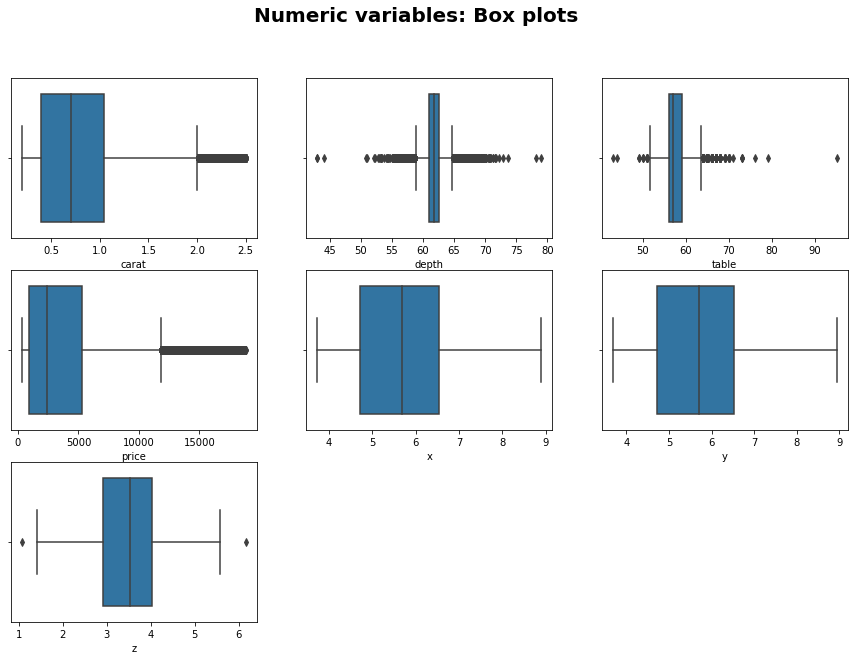

In [71]:
# Outliers part 2
"""
We found that using a 1.5 IQR removes too many data, which we would need to build a reliable model. 
Therefore, we check the data distribution again and decide on the cutoff for each property separately. 
X has outliers, however they do not seem unrealistic. A length of 10 mm is plausible, therefore, 
we do not remove any data here.

Y and Z have got some extreme outliers, namely width above 30 mmm. 
That seems unlikely. These three datapoints will be removed. 

Carat has got a large range and the distribution has got a long tail (right-skew). 
Most diamonds are under 2.5 carats and the diamonds above this weight could distort our model. 
The largest 1% of data will be ignored. We therefore filter diamonds above 99% quantile. 
"""
index_diamond = df_diamond[ (df_diamond['y'] > 20) | (df_diamond['z'] > 10) | (df_diamond['carat'] > 2.5)].index
df_diamond.drop(index_diamond, inplace=True)
df_diamond.describe()

sns.displot(data=df_diamond, x='price',binwidth= 50)
sns.displot(data=df_diamond, x='carat',binwidth= 0.01)

#Price distribution also has a long tail. despite filtering out the largest diamonds. 
#We also observe a price gap at ca. 1500 dollars, this could be an error in the data. We also notice, that price distribution and carat distribution are different, meaning that the price of a diamond is not a simple function of carat. 
#Lets see the Boxplots of numerical variables with removed outliers:

# plot boxplot of numeric variables to visualize outliers

fig=plt.figure(figsize=(15,10))
plt.suptitle("Numeric variables: Box plots", size=20, weight='bold')

j=0
for i in int_cols:
    ax=plt.subplot(331+j)
    ax=sns.boxplot(data=df_diamond, x=i)
    j=j+1

percentage_of_removed_data=(53794-53651)/53794 * 100
percentage_of_removed_data

#We have only removed 0.27% of all data due to outliers. 
#This shold not have a noticeable impact on the model building, 
#therefore, we decided to keep this outliers removal method.

In [72]:
# Get list of categorical variables
s = (df_diamond.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [73]:
label_encoder = LabelEncoder() 

df_diamond['cut'] = label_encoder.fit_transform(df_diamond['cut'])
df_diamond['color'] = label_encoder.fit_transform(df_diamond['color'])
df_diamond['clarity'] = label_encoder.fit_transform(df_diamond['clarity'])
df_diamond.head()

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75

<AxesSubplot:>

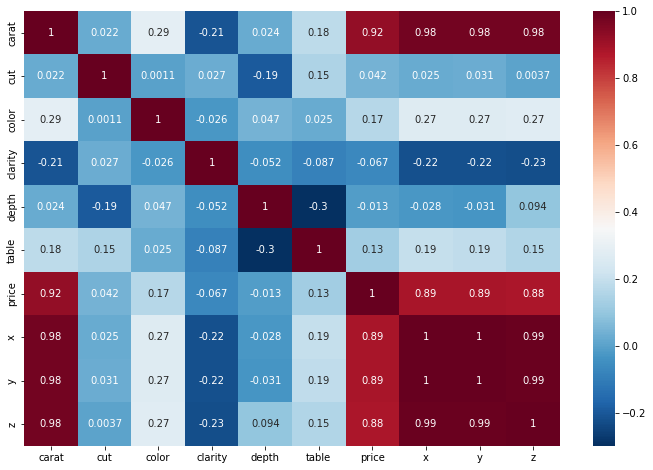

In [74]:
plt.figure(figsize=(12,8))
sns.heatmap(df_diamond.corr(),
 annot=True,
 cmap='RdBu_r')

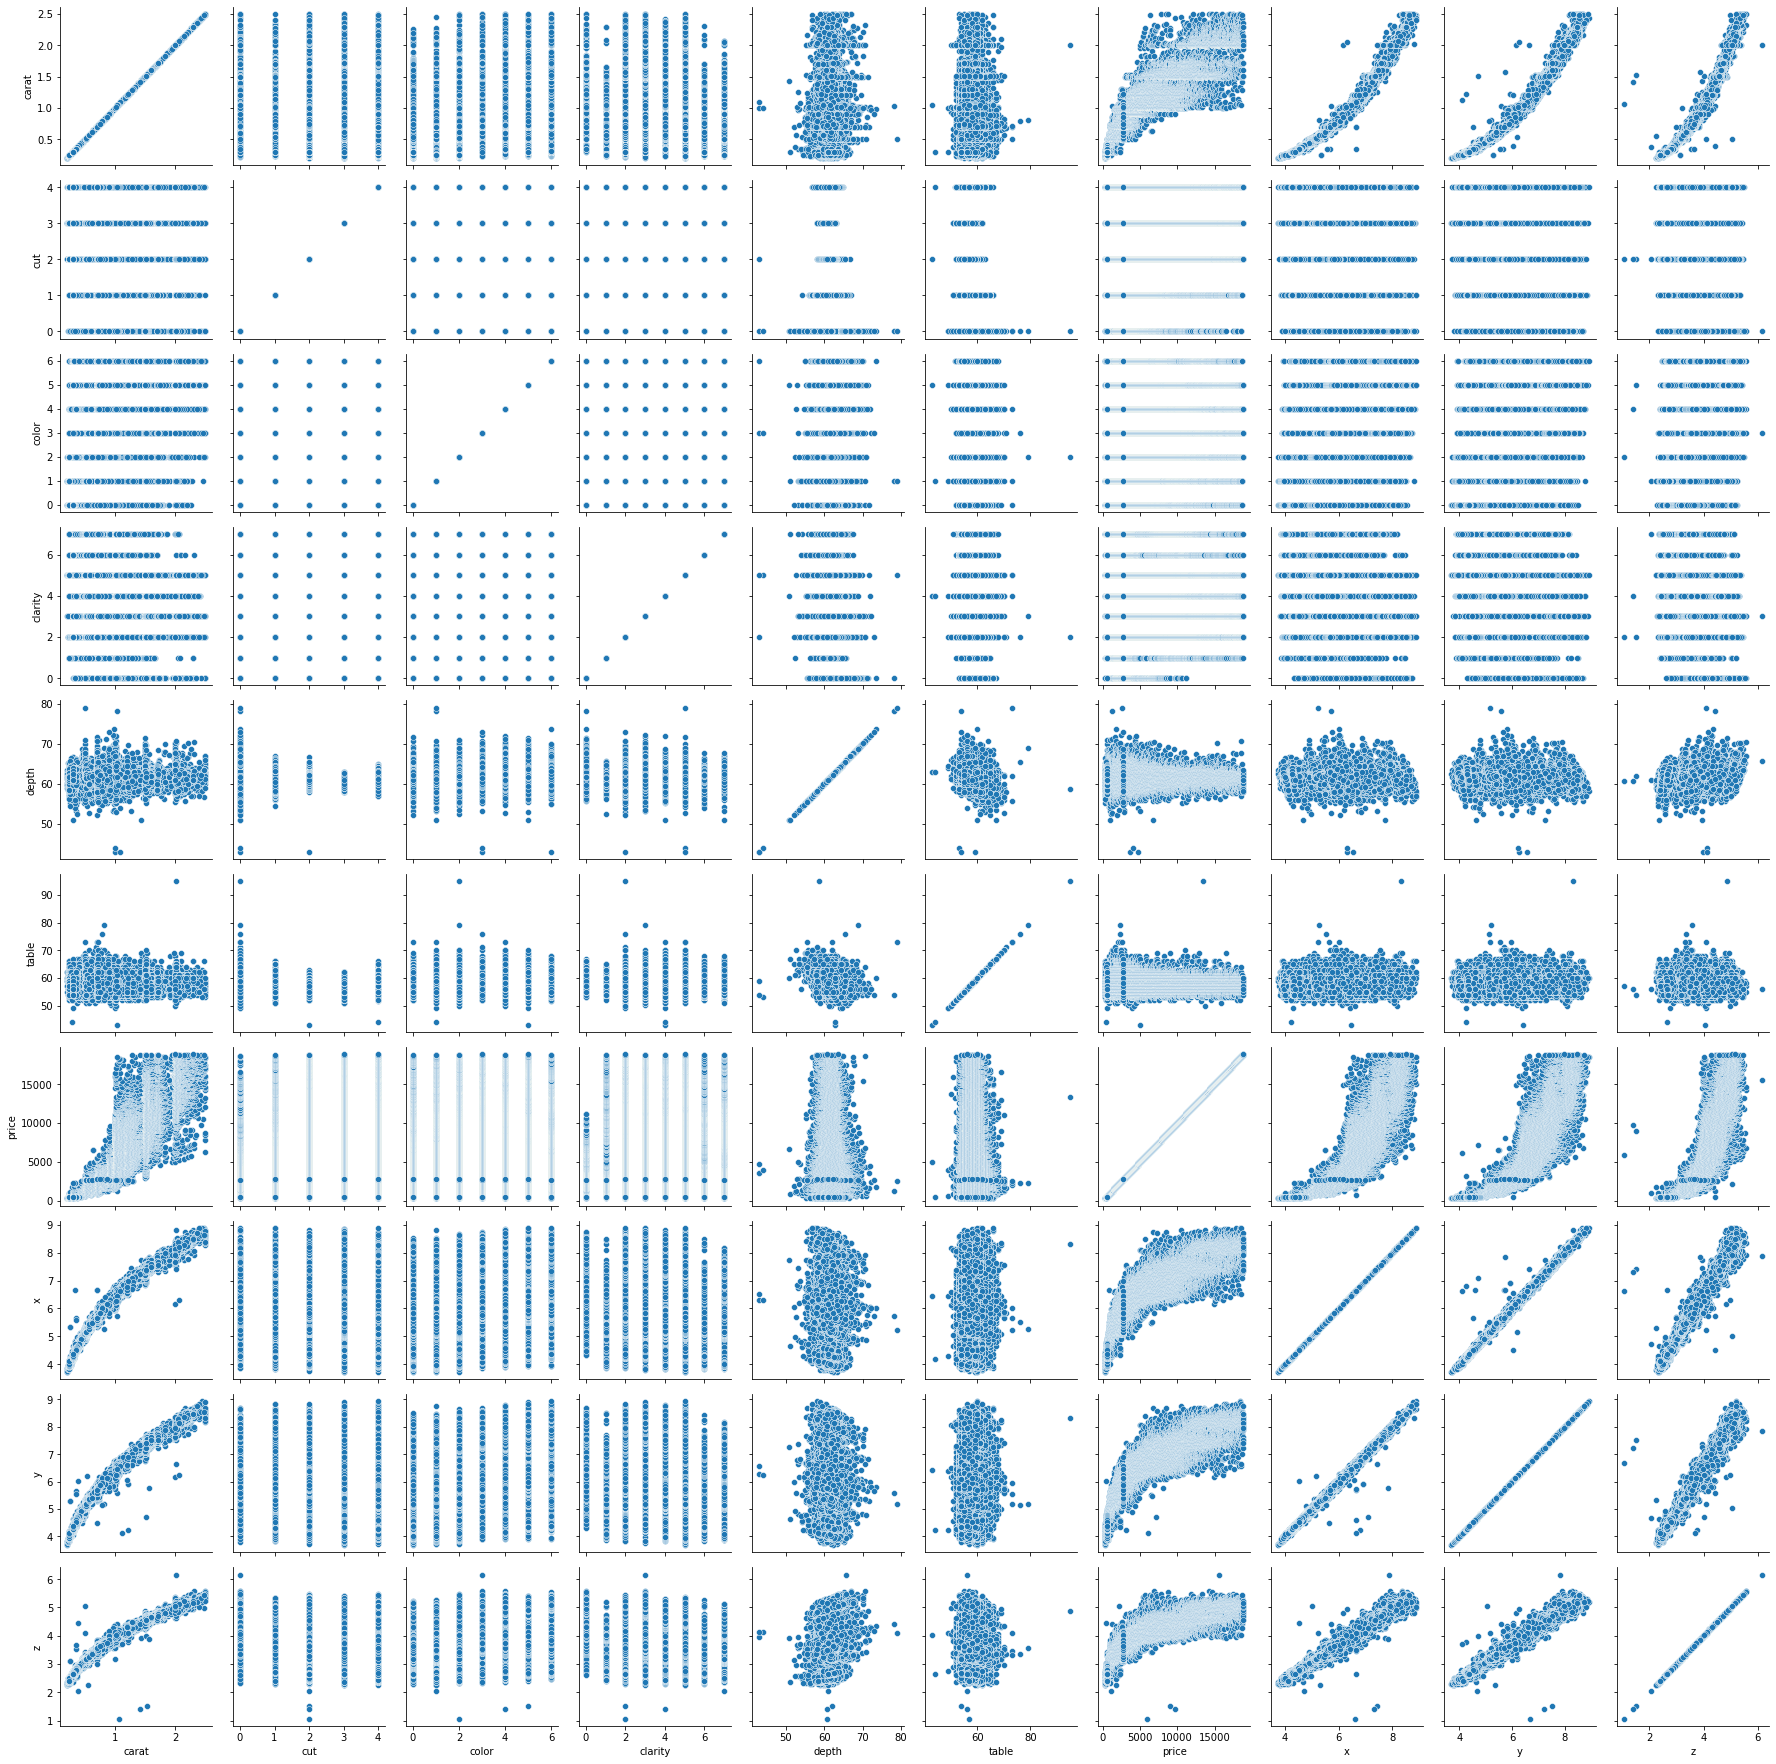

In [75]:
g = sns.PairGrid(df_diamond)
g.map(sns.scatterplot)

In [76]:
df_diamond.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [77]:
X = df_diamond.drop(['price'], axis=1)
y = df_diamond['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)

In [78]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

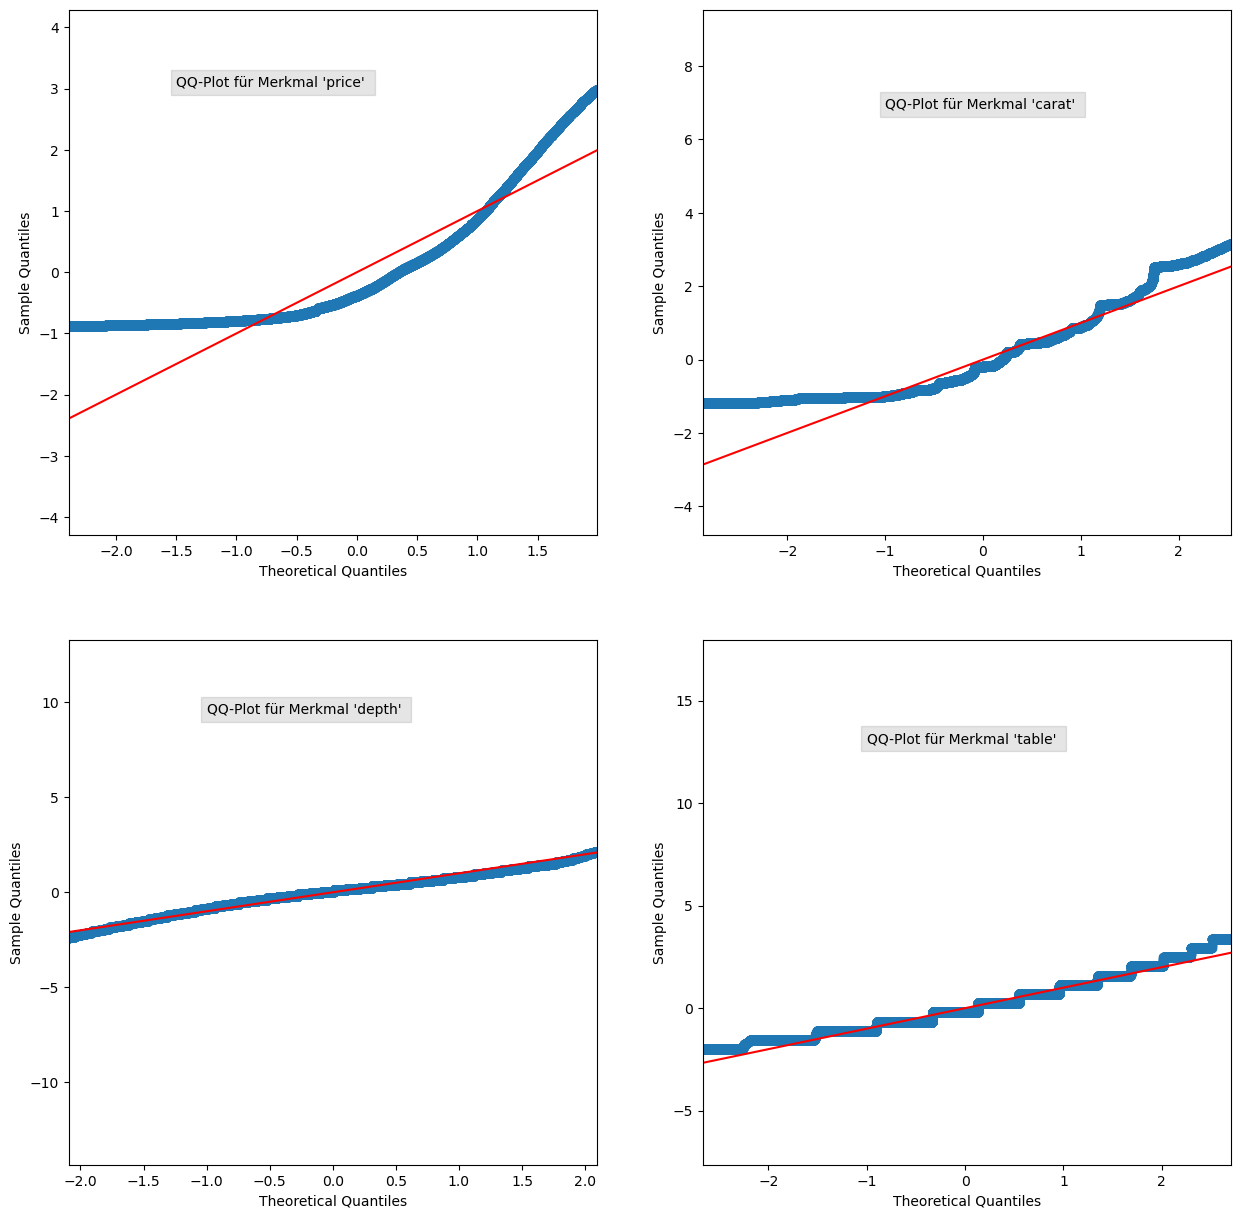

In [56]:
#MB_ANFANG

# Untersuchung der metrischen Merkmale "price", "carat", "depth" und "table" auf Normalverteilung:

#Das Quantil-Quantil-Diagramm dient zur Prüfung von Variablen
# auf Normalverteilung.
# Es vergleicht die tatsächliche Verteilung einer Variable
# mit der idealtypischen Normalverteilung – mithilfe der Quantile.
# Letzteres ist eher unwichtig, da eigentlich nur ein Streudiagramm mit
# einer Gerade erzeugt und interpretiert werden muss.
# Für das Q-Q-Diagramm empfiehlt sich eine z-Standardisierung
# der betreffenden Variable. 


c_valuator = 1.5

data_price = stats.zscore(df_diamond.price)    #  Skalenniveau ( $, [326 ; 18823] )
max_sampleprice = max(data_price)
min_sampleprice = min(data_price)
third_pricequartiles = st.quantiles(data_price, n=4)
iqr_pricequartiles = third_pricequartiles[2] - third_pricequartiles[0]

data_carat = stats.zscore(df_diamond.carat)    #  Skalenniveau (Gewicht in ct, [0,2 ; 5.01] )
max_samplecarat = max(data_carat)
min_samplecarat = min(data_carat)
third_caratquartiles = st.quantiles(data_carat, n=4)
iqr_caratquartiles = third_caratquartiles[2] - third_caratquartiles[0]

data_depth = stats.zscore(df_diamond.depth)    #  Skalenniveau ( mm, [0 ; 31,8] )
max_sampledepth = max(data_depth)
min_sampledepth = min(data_depth)
third_depthquartiles = st.quantiles(data_depth, n=4)
iqr_depthquartiles = third_depthquartiles[2] - third_depthquartiles[0]

data_table = stats.zscore(df_diamond.table)    #  Skalenniveau (%, [43 ; 95] )
max_sampletable = max(data_table)
min_sampletable = min(data_table)
third_tablequartiles = st.quantiles(data_table, n=4)
iqr_tablequartiles = third_tablequartiles[2] - third_tablequartiles[0]


fig=plt.figure(figsize=(15,15))

ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(data_price,line='45', ax=ax)
ax.set_xlim(third_pricequartiles[0]-c_valuator*iqr_pricequartiles, third_pricequartiles[2]+c_valuator*iqr_pricequartiles)
#ax.set_ylim(min_sampleprice, max_sampleprice)
left = -1.5   #x coordinate for text insert
top = ax.get_ylim()[1] * 0.75
txt = ax.text(left, top, "QQ-Plot für Merkmal 'price' ", verticalalignment='top')
txt.set_bbox(dict(facecolor='k', alpha=0.1))

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(data_carat, line='s', ax=ax)
ax.set_xlim(third_caratquartiles[0]-c_valuator*iqr_caratquartiles, third_caratquartiles[2]+c_valuator*iqr_caratquartiles)
#ax.set_ylim(min_samplecarat, max_samplecarat)
left = -1   #x coordinate for text insert
top = ax.get_ylim()[1] * 0.75
txt = ax.text(left, top,"QQ-Plot für Merkmal 'carat' ", verticalalignment='top')
txt.set_bbox(dict(facecolor='k', alpha=0.1))

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(data_depth, line='45', fit=True, ax=ax)
ax.set_xlim(third_depthquartiles[0]-c_valuator*iqr_depthquartiles, third_depthquartiles[2]+c_valuator*iqr_depthquartiles)
#ax.set_ylim(min_sampledepth, max_sampledepth)
left = -1  #x coordinate for text insert
top = ax.get_ylim()[1] * 0.75
txt = ax.text(left, top,"QQ-Plot für Merkmal 'depth' ", verticalalignment='top')
txt.set_bbox(dict(facecolor='k', alpha=0.1))

ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(data_table, line='45', fit=True, ax=ax)
ax.set_xlim(third_tablequartiles[0]-c_valuator*iqr_tablequartiles, third_tablequartiles[2]+c_valuator*iqr_tablequartiles)
#ax.set_ylim(min_sampletable, max_sampletable)
left = -1   #x coordinate for text insert
top = ax.get_ylim()[1] * 0.75
txt = ax.text(left, top, "QQ-Plot für Merkmal 'table' ", verticalalignment='top')
txt.set_bbox(dict(facecolor='k', alpha=0.1))
   

# Hier ist es wichtig, dass die Beobachtungen (=Punkte) möglichst
# auf oder nahe der idealen Normalverteilung (= Gerade) liegen.
# Je weiter weg Punkte sind, desto eher bezeichnet man sie als "Ausreißer"
# bzw. sind sie von einer idealen Normalverteilung weg.
# Eine genaue Vorgehensweise, was normalverteilt ist und was nicht,
# gibt es allerdings nicht.
# Wenn die Mehrheit der Punkte auf oder nahe der Gerade liegen,
# ist dies meist ausreichend, um von einer hinreichenden
# Normalverteilung auszugehen.
# Exakt einer Normalverteilung wird sowieso fast nie eine Verteilung entsprechen,
# weswegen der Anwender hier auch mitunter etwas pragmatischer sein kann.


# Ergebnis: Für die relevanten Merkmale "carat" und "price" liegen keine Normaverteilungen vor.

#MB_ENDE

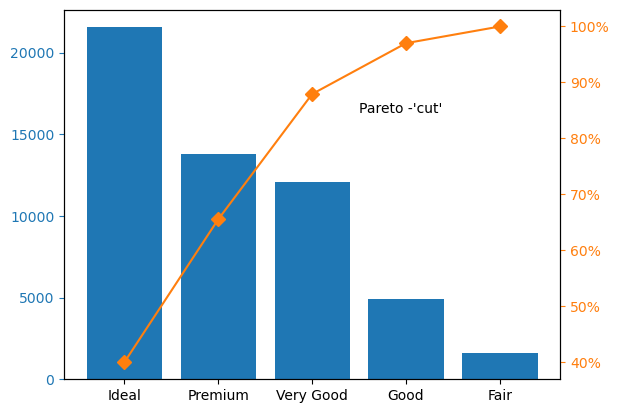

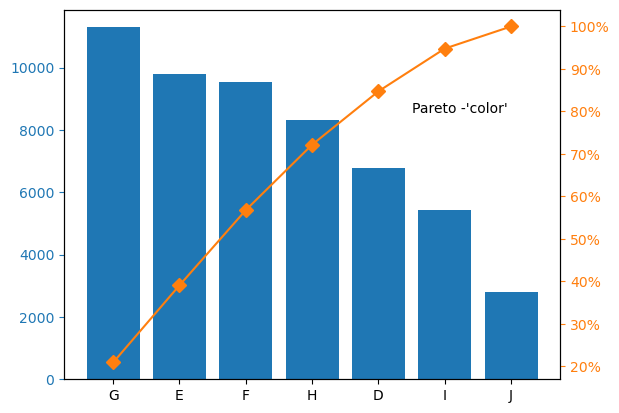

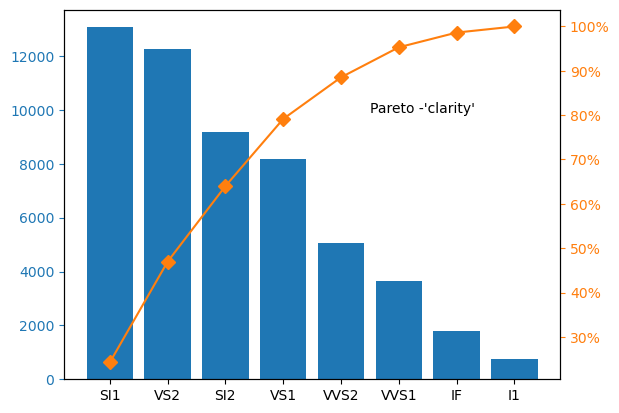

In [57]:
#MB_Anfang

# Untersuchung der ordinalen Merkmale "cut", "color" und "clarity" mit Pareto-Charts:

cat_cols=df_diamond.select_dtypes(include='object').columns.to_list()

sample1 = df_diamond.copy(deep=True)
sample2 = sample1[cat_cols[0]].value_counts()
sample3 = pd.DataFrame(sample2)
sample3['cut_art'] = sample2.index
sample3.rename(columns={'cut': 'cut_absolute'}, inplace=True)
sample3 = sample3.sort_values(by='cut_absolute',ascending=False)
sample3['cut_percentage'] = (sample3['cut_absolute'].cumsum()) / (sample3['cut_absolute'].sum())*100

fig, ax = plt.subplots()
ax.bar(sample3['cut_art'], sample3['cut_absolute'], color="C0")
ax2 = ax.twinx()
ax2.plot(sample3['cut_art'], sample3['cut_percentage'], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

left = 2.5  #x coordinate for text insert
top = ax.get_ylim()[1] * 0.75
txt = ax.text(left, top,"Pareto -'cut' ", verticalalignment='top')
plt.show()



bsample1 = df_diamond.copy(deep=True)
bsample2 = bsample1[cat_cols[1]].value_counts()
bsample3 = pd.DataFrame(bsample2)
bsample3['color_art'] = bsample2.index
bsample3.rename(columns={'color': 'color_absolute'}, inplace=True)
bsample3 = bsample3.sort_values(by='color_absolute',ascending=False)
bsample3['color_percentage'] = (bsample3['color_absolute'].cumsum()) / (bsample3['color_absolute'].sum())*100

bfig, bax = plt.subplots()
bax.bar(bsample3['color_art'], bsample3['color_absolute'], color="C0")
bax2 = bax.twinx()
bax2.plot(bsample3['color_art'], bsample3['color_percentage'], color="C1", marker="D", ms=7)
bax2.yaxis.set_major_formatter(PercentFormatter())

bax.tick_params(axis="y", colors="C0")
bax2.tick_params(axis="y", colors="C1")

left = 4.5  #x coordinate for text insert
top = bax.get_ylim()[1] * 0.75
txt = bax.text(left, top,"Pareto -'color' ", verticalalignment='top')
plt.show()





csample1 = df_diamond.copy(deep=True)
csample2 = csample1[cat_cols[2]].value_counts()
csample3 = pd.DataFrame(csample2)
csample3['clarity_art'] = csample2.index
csample3.rename(columns={'clarity': 'clarity_absolute'}, inplace=True)
csample3 = csample3.sort_values(by='clarity_absolute',ascending=False)
csample3['clarity_percentage'] = (csample3['clarity_absolute'].cumsum()) / (csample3['clarity_absolute'].sum())*100

cfig, cax = plt.subplots()
cax.bar(csample3['clarity_art'], csample3['clarity_absolute'], color="C0")
cax2 = cax.twinx()
cax2.plot(csample3['clarity_art'], csample3['clarity_percentage'], color="C1", marker="D", ms=7)
cax2.yaxis.set_major_formatter(PercentFormatter())

cax.tick_params(axis="y", colors="C0")
cax2.tick_params(axis="y", colors="C1")

left = 4.5  #x coordinate for text insert
top = cax.get_ylim()[1] * 0.75
txt = cax.text(left, top,"Pareto -'clarity' ", verticalalignment='top')
plt.show()


#absfreq = df_diamond.groupby(['color','cut', 'clarity']).size() 
#absfreq


#MB_Ende

In [79]:
# Get list of categorical variables
s = (df_diamond.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
[]


In [80]:
label_encoder = LabelEncoder() 

df_diamond['cut'] = label_encoder.fit_transform(df_diamond['cut'])
df_diamond['color'] = label_encoder.fit_transform(df_diamond['color'])
df_diamond['clarity'] = label_encoder.fit_transform(df_diamond['clarity'])
df_diamond.head()

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75

<AxesSubplot:>

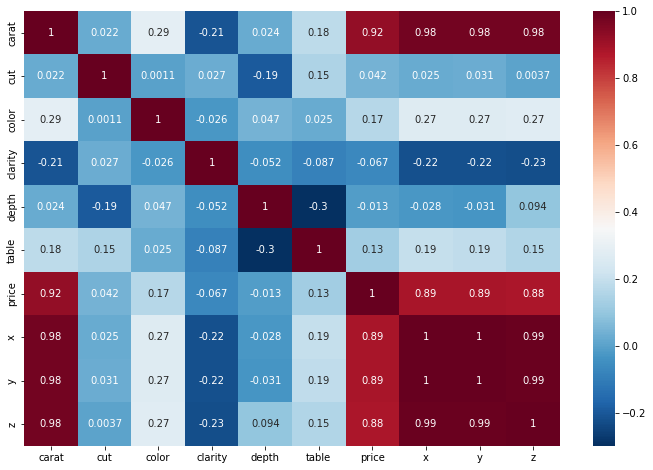

In [81]:
plt.figure(figsize=(12,8))
sns.heatmap(df_diamond.corr(),
 annot=True,
 cmap='RdBu_r')

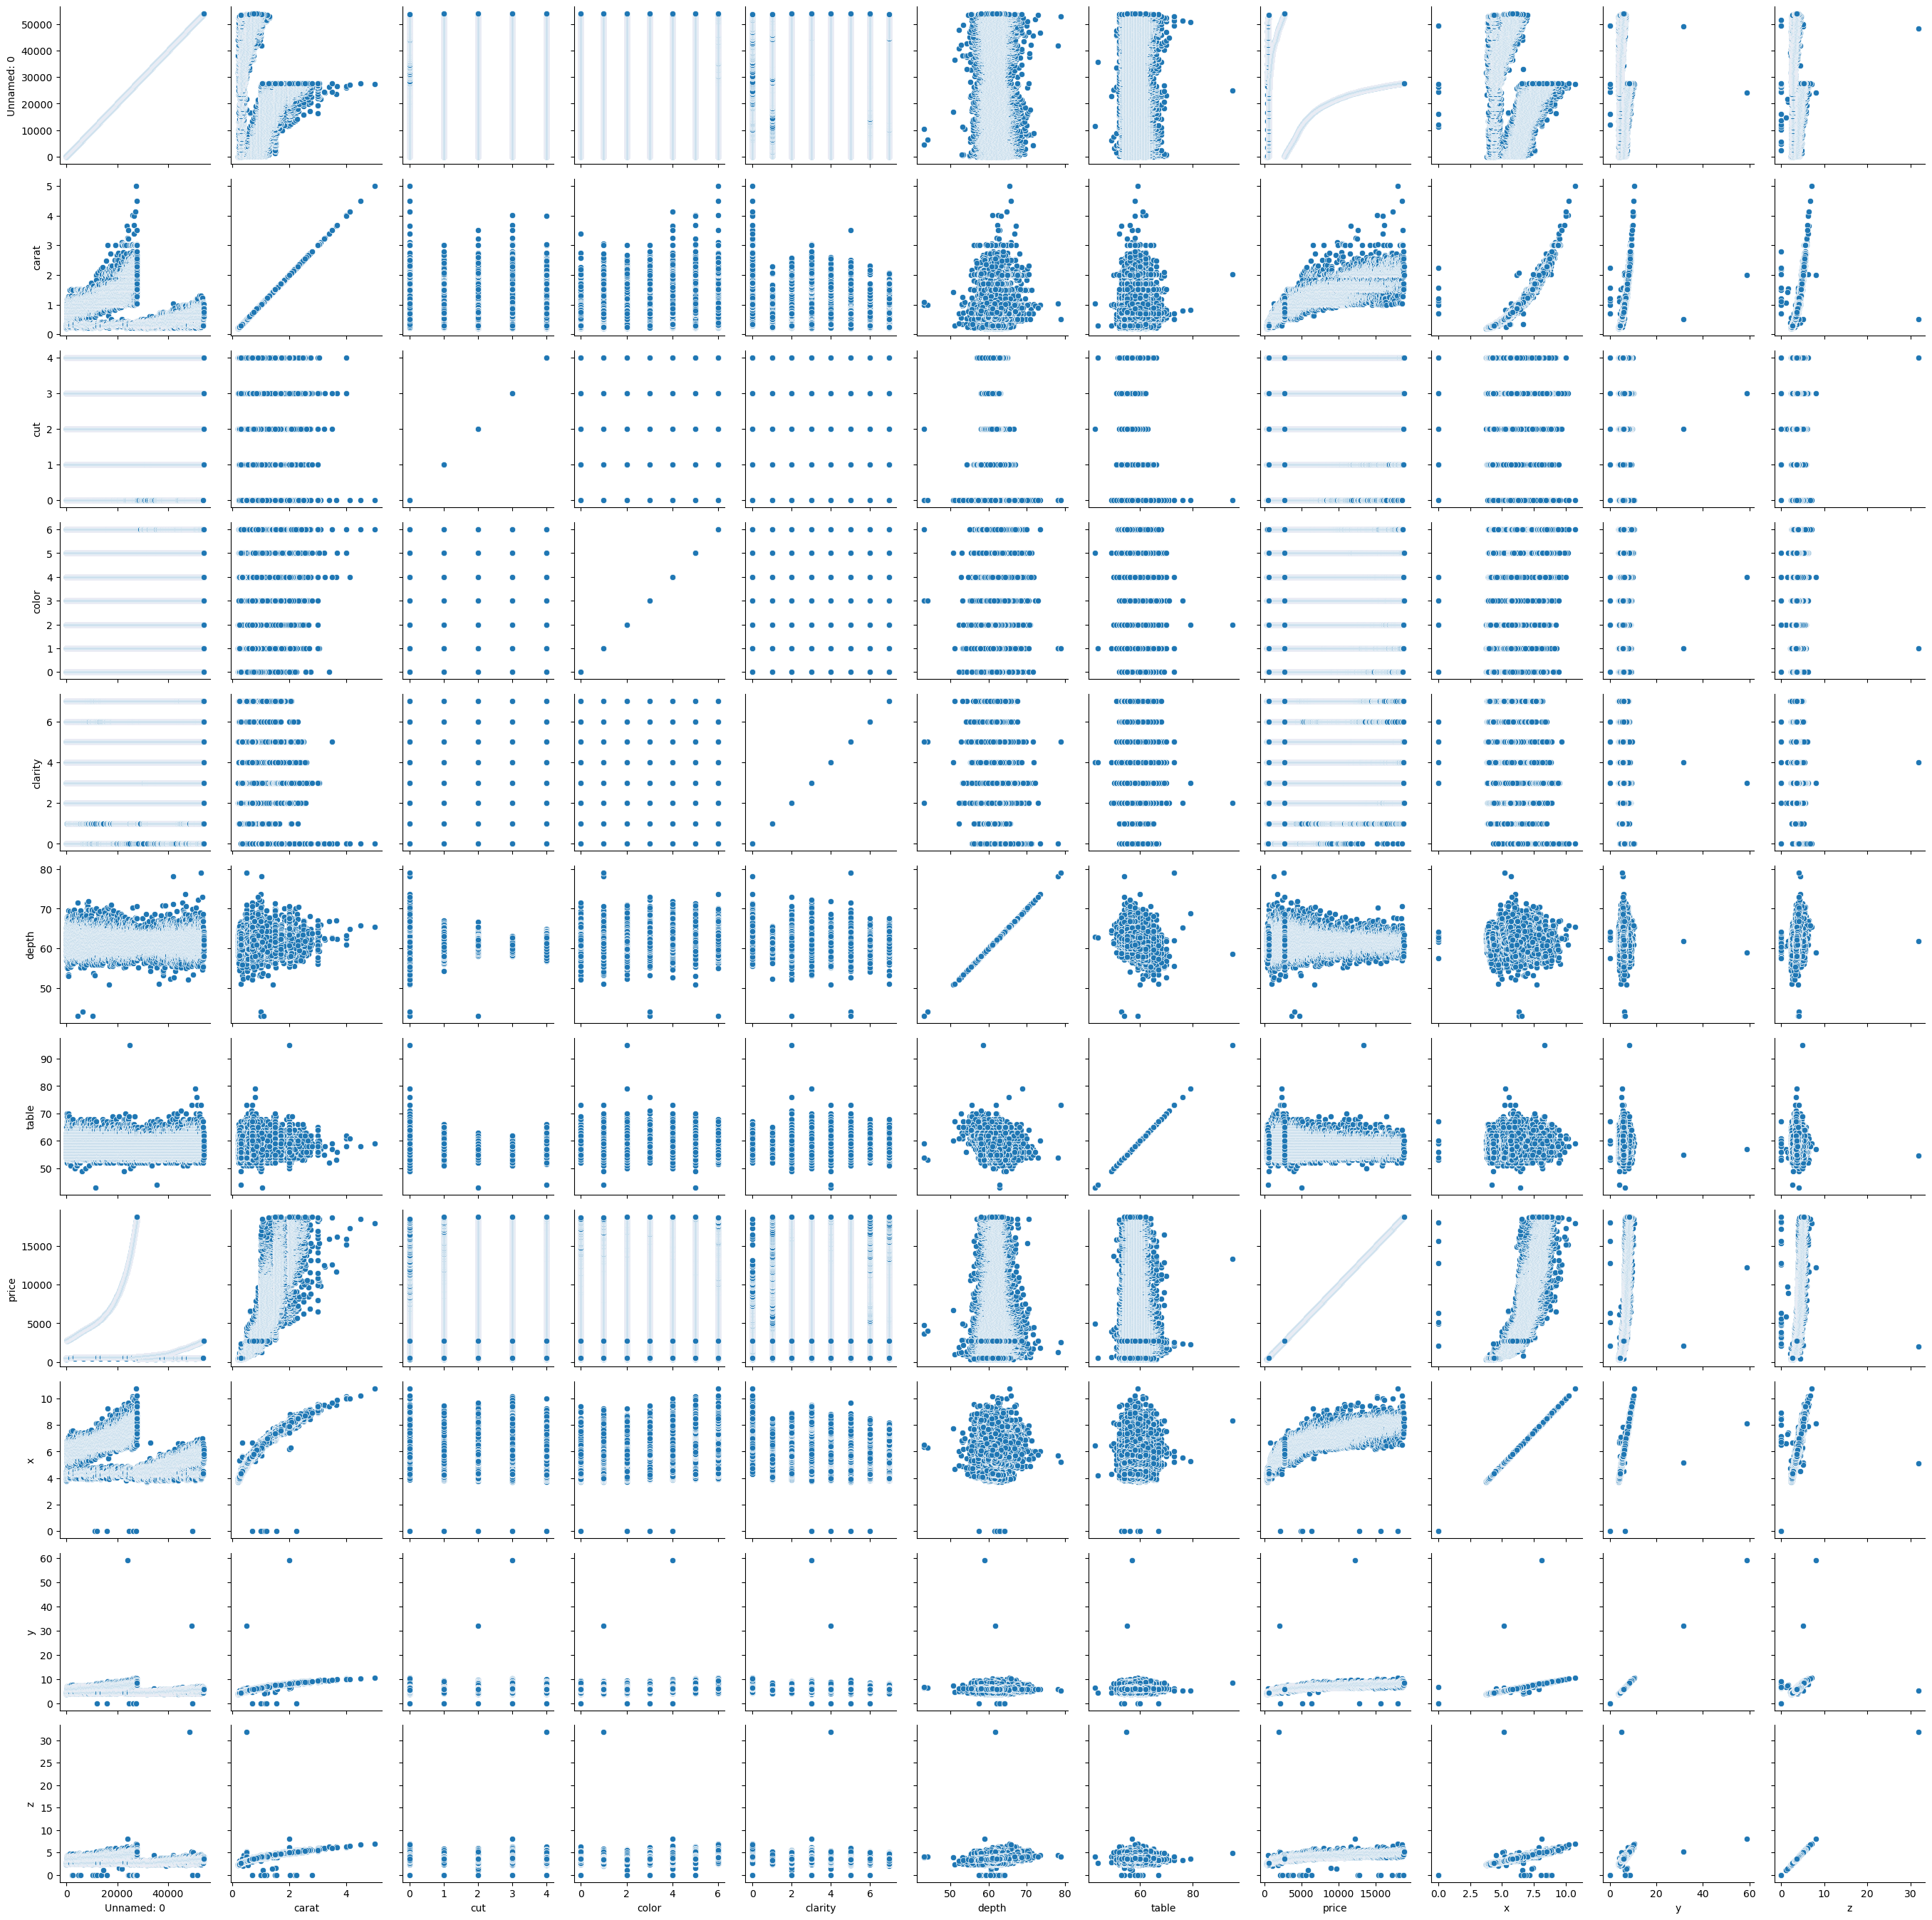

In [61]:
g = sns.PairGrid(df_diamond)
g.map(sns.scatterplot)

<a id="4"></a>
 <h1 style='background:#00B0F0; border:0; color:black'><center>MODEL ERSTELLUNG UND TESTEN</center></h1> 
# Model Erstellung und Testen

**Steps involved in Model Erstellung und Testen**

* Setting up features and target
* Build a pipeline of standard scalar and model for five different regressors.
* Fit all the models on training data
* Get mean of cross-validation on the training set for all the models for negative root mean square error
* Pick the model with the best cross-validation score
* Fit the best model on the training set and get

## Algorithmen oberflächlich testen

### Mit Standart Scaler

In [64]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_slr = Pipeline([("scalar1",StandardScaler()), ("lr",LinearRegression())])
pipeline_sla = Pipeline([("scalar2",StandardScaler()), ("la",Lasso(tol=0.01))])
pipeline_sri = Pipeline([("scalar3",StandardScaler()), ("ri",Ridge())])
pipeline_srf = Pipeline([("scalar4",StandardScaler()), ("rf",RandomForestRegressor())])
pipeline_skn = Pipeline([("scalar5",StandardScaler()), ("kn",KNeighborsRegressor())])
pipeline_sdt = Pipeline([("scalar6",StandardScaler()),("dt",DecisionTreeRegressor())])


In [68]:
# List of all the pipelines
pipelines_s = [pipeline_slr, pipeline_sla, pipeline_sri, pipeline_srf, pipeline_skn, pipeline_sdt] 

# Dictionary of pipelines and model types for ease of reference 
pipe_dict = {0: "LinearRegression", 1: "Lasso", 2: "Ridge", 3: "RandomForestRegressor", 4: "KNeighborsRegressor", 5: "DecisionTreeRegressor"}

# Fit the pipelines get the scores.
scores_s = []
for i, model in enumerate(pipelines_s):
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    if score > 0.99:
        result = "Possible Overfit"
    elif score < 0.7:
        result = "Underfit"
    else:
        result = "Reasonable"
    score_data = [pipe_dict[i], round(score, 4), result]
    scores_s.append(score_data)

# Scores to dataframe
df_scores_s = pd.DataFrame(scores_s)
df_scores_s.columns = ["Model Name", "Score", "Result"]
df_scores_s.sort_values(by="Score", ascending=False)


Model Name   Score            Result
5  DecisionTreeRegressor  1.0000  Possible Overfit
3  RandomForestRegressor  0.9973  Possible Overfit
4    KNeighborsRegressor  0.9736        Reasonable
0       LinearRegression  0.8946        Reasonable
2                  Ridge  0.8946        Reasonable
1                  Lasso  0.8944        Reasonable

### Mit MinMax Scaler

In [93]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_mlr = Pipeline([("scalar1",MinMaxScaler()), ("lr",LinearRegression())])
pipeline_mla = Pipeline([("scalar2",MinMaxScaler()), ("la",Lasso(tol=0.001))])
pipeline_mri = Pipeline([("scalar3",MinMaxScaler()), ("ri",Ridge())])
pipeline_mrf = Pipeline([("scalar4",MinMaxScaler()), ("rf",RandomForestRegressor())])
pipeline_mkn = Pipeline([("scalar5",MinMaxScaler()), ("kn",KNeighborsRegressor())])
pipeline_mdt = Pipeline([("scalar6",MinMaxScaler()),("dt",DecisionTreeRegressor())])

In [94]:
# List of all the pipelines
pipelines_m = [pipeline_mlr, pipeline_mla, pipeline_mri, pipeline_mrf, pipeline_mkn, pipeline_mdt] 

# Dictionary of pipelines and model types for ease of reference 
pipe_dict = {0: "LinearRegression", 1: "Lasso", 2: "Ridge", 3: "RandomForestRegressor", 4: "KNeighborsRegressor", 5: "DecisionTreeRegressor"}

# Fit the pipelines get the scores.
scores_m = []
for i, model in enumerate(pipelines_m):
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    if score > 0.99:
        result = "Possible Overfit"
    elif score < 0.7:
        result = "Underfit"
    else:
        result = "Reasonable"
    score_data = [pipe_dict[i], round(score, 4), result]
    scores_m.append(score_data)

# Scores to dataframe
df_scores_m = pd.DataFrame(scores_m)
df_scores_m.columns = ["Model Name", "Score", "Result"]
df_scores_m.sort_values(by="Score", ascending=False)

Model Name   Score            Result
5  DecisionTreeRegressor  1.0000  Possible Overfit
3  RandomForestRegressor  0.9974  Possible Overfit
4    KNeighborsRegressor  0.9836        Reasonable
0       LinearRegression  0.8946        Reasonable
2                  Ridge  0.8945        Reasonable
1                  Lasso  0.8935        Reasonable

## Linear Regresion, Lasso and Ridge

In [95]:
# List of all the pipelines
lr_pipelines = [pipeline_mlr, pipeline_mla, pipeline_mri]

# Dictionary of pipelines and model types for ease of reference
lr_dict = {0: "LinearRegression", 1: "Lasso", 2: "Ridge"}

# Fit the pipelines
scores2 = []
for i, model in enumerate(lr_pipelines):
    model.fit(X_train, y_train)
    cvs = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)**0.5
    score_r2 = r2_score(y_test, y_pred)
    score_data2 = [pipe_dict[i], round(score_r2, 4), round(cvs.mean(), 4), round(mse, 4), round(mae, 4), round(rmse, 4)]
    scores2.append(score_data2)

# Scores to dataframe
df_scores2 = pd.DataFrame(scores2)
df_scores2.columns = ["Model Name", "Score_R2", "Score_CV", "MSE", "MAE", "RMSE"]
df_scores2.sort_values(by="Score_R2", ascending=False)



Model Name  Score_R2  Score_CV           MSE       MAE       RMSE
0  LinearRegression    0.8931    0.8945  1.686091e+06  834.9792  1298.4958
2             Ridge    0.8928    0.8944  1.690209e+06  835.9587  1300.0804
1             Lasso    0.8918    0.8934  1.706253e+06  837.3424  1306.2363

In [96]:
# Algorithmen intensiver testen : LinearRegression
param_grid = [
    {"fit_intercept": [True, False]}
  ]

lr_reg = LinearRegression()
grid_search = GridSearchCV(lr_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)
print("GS LR Best parameters: ", grid_search.best_params_)
print("GS LR Best estimator: ", grid_search.best_estimator_)
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

GS LR Best parameters:  {'fit_intercept': True}
GS LR Best estimator:  LinearRegression()
1281.119982500396 {'fit_intercept': True}
4112.860605108131 {'fit_intercept': False}


In [74]:
# Algorithmen intensiver testen : Lasso
param_grid = [
    {'alpha': [1, 5, 10], "fit_intercept": [True, False]}
  ]

lasso_reg = Lasso(tol=0.1)
grid_search = GridSearchCV(lasso_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)
print("GS Lasso Best parameters: ", grid_search.best_params_)
print("GS Lasso Best estimator: ", grid_search.best_estimator_)
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

GS Lasso Best parameters:  {'alpha': 1, 'fit_intercept': True}
GS Lasso Best estimator:  Lasso(alpha=1, tol=0.1)
1353.6018795028754 {'alpha': 1, 'fit_intercept': True}
4113.493726461718 {'alpha': 1, 'fit_intercept': False}
1354.2433911715011 {'alpha': 5, 'fit_intercept': True}
4115.0055028011675 {'alpha': 5, 'fit_intercept': False}
1354.6454175946317 {'alpha': 10, 'fit_intercept': True}
4117.912236032825 {'alpha': 10, 'fit_intercept': False}


In [75]:
# Algorithmen intensiver testen : Ridge
param_grid = [
    {'alpha': [1, 5, 10], "fit_intercept": [True, False]}
  ]

ridge_reg = Ridge()
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)
print("GS Ridge Best parameters: ", grid_search.best_params_)
print("GS Ridge Best estimator: ", grid_search.best_estimator_)
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

GS Ridge Best parameters:  {'alpha': 1, 'fit_intercept': True}
GS Ridge Best estimator:  Ridge(alpha=1)
1281.1115726341527 {'alpha': 1, 'fit_intercept': True}
4112.850660561731 {'alpha': 1, 'fit_intercept': False}
1281.1548993241306 {'alpha': 5, 'fit_intercept': True}
4112.839266732026 {'alpha': 5, 'fit_intercept': False}
1281.3296734376802 {'alpha': 10, 'fit_intercept': True}
4112.870042273604 {'alpha': 10, 'fit_intercept': False}


### Linear Regression Models - System Testen mit dem Testset

Best Model seems to be Ridge with 1281.11 nmse and alpha = 1, fit_intercept = True

In [96]:

r_test = Ridge(alpha=1, fit_intercept=True)
r_test.fit(X_train_scaled, y_train)

# Prediction
ypred_test =  r_test.predict(X_test_scaled)

# Checking Accuracy
print(r2_score(y_test, ypred_test))

0.893090135053985


## Random forest

--------------------------------------------------------------------------------------------------------------
Random Forest Model with 5 estimators)
--------------------------------------------------------------------------------------------------------------
Mean Absolute Error is 292.094

Mean Squared Error is 339832.302

Mean Absolute Percentage Error is 0.072

R Squared Error is 0.978



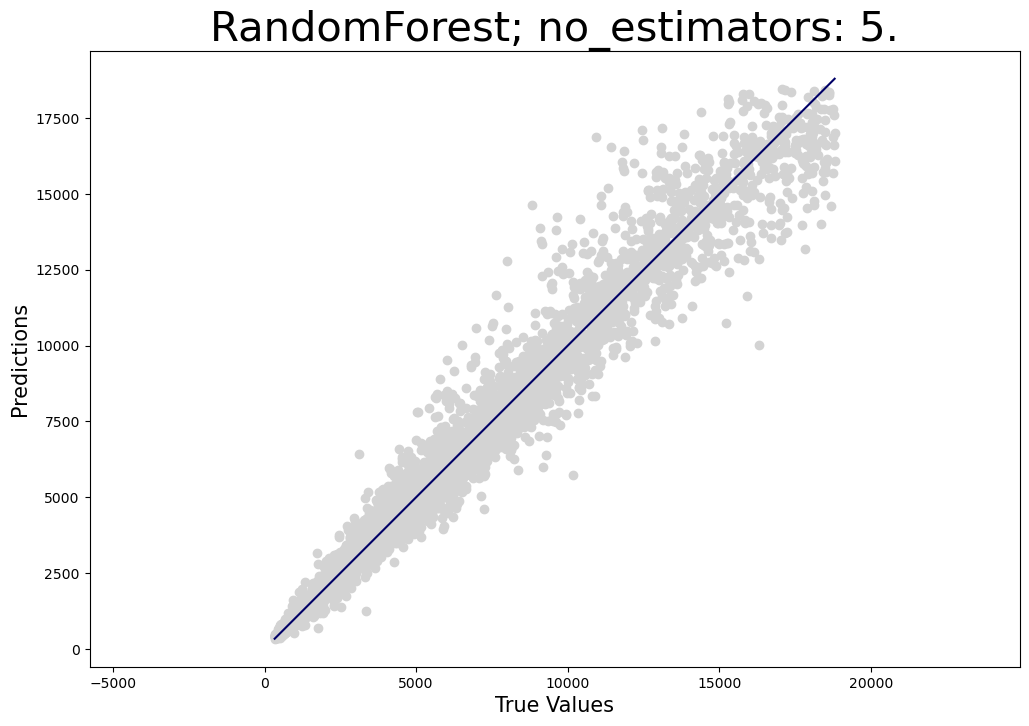

Model score:  0.9953362130557308
Cross validation scores:  [0.97764368 0.97505323 0.97489244]
Accuracy of model with Train data: 0.995
Accuracy of model with Test data: 0.978


--------------------------------------------------------------------------------------------------------------
Random Forest Model with 10 estimators)
--------------------------------------------------------------------------------------------------------------
Mean Absolute Error is 280.880

Mean Squared Error is 314329.780

Mean Absolute Percentage Error is 0.069

R Squared Error is 0.980



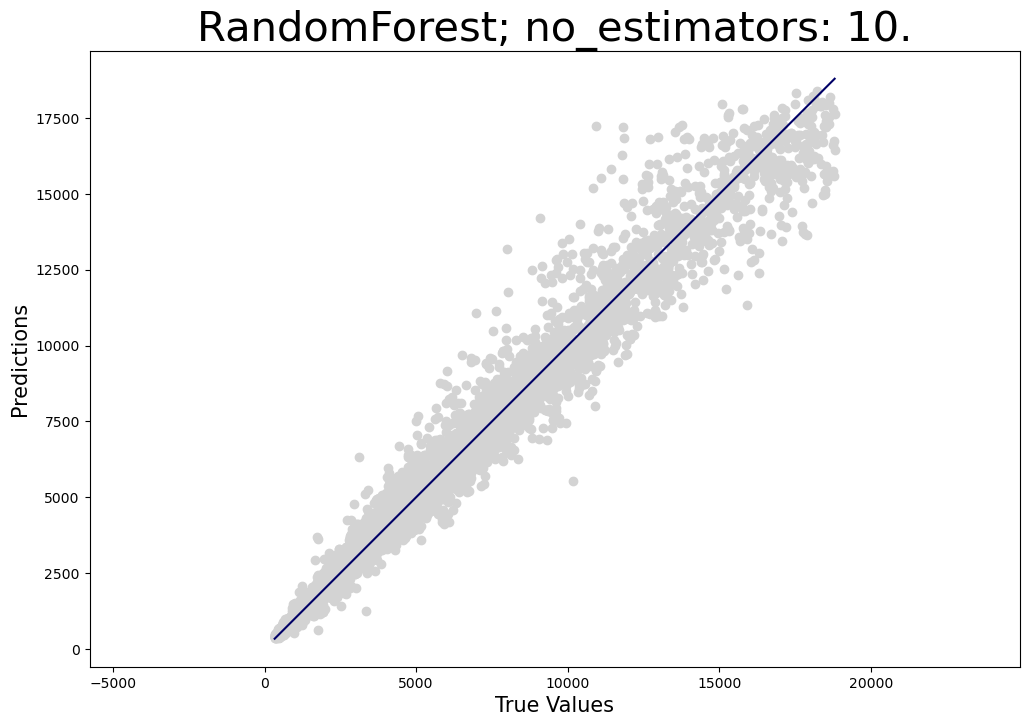

Model score:  0.9962870232461318
Cross validation scores:  [0.97910641 0.97783147 0.9774189 ]
Accuracy of model with Train data: 0.996
Accuracy of model with Test data: 0.98


--------------------------------------------------------------------------------------------------------------
Random Forest Model with 50 estimators)
--------------------------------------------------------------------------------------------------------------
Mean Absolute Error is 267.780

Mean Squared Error is 287424.060

Mean Absolute Percentage Error is 0.065

R Squared Error is 0.982



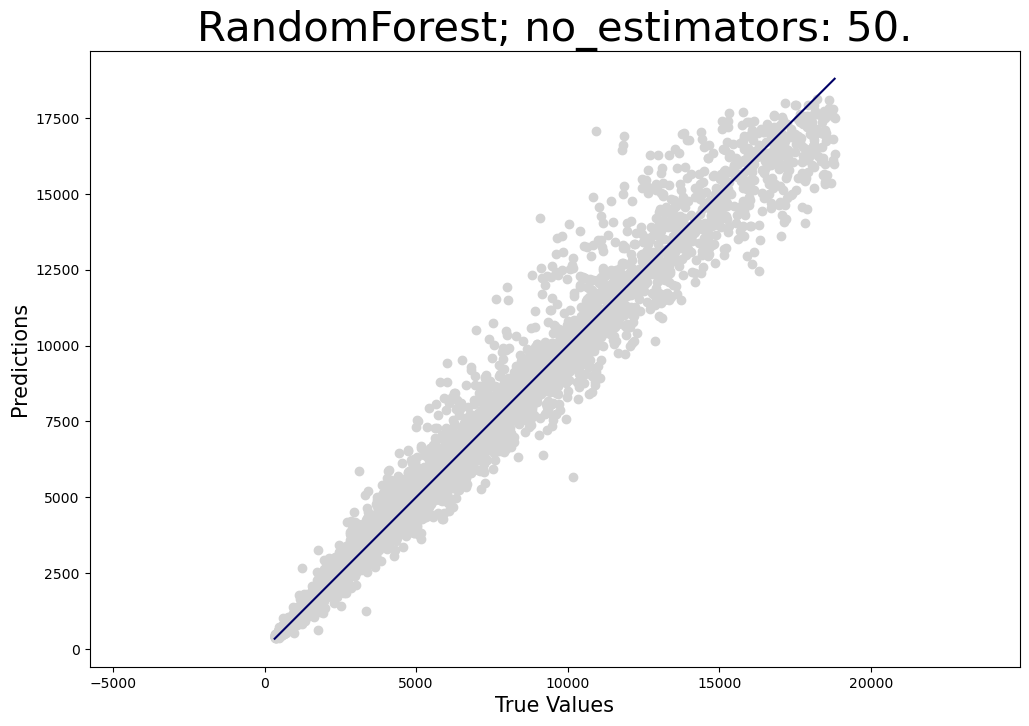

Model score:  0.9973197888293631
Cross validation scores:  [0.98073877 0.97931559 0.97908723]
Accuracy of model with Train data: 0.997
Accuracy of model with Test data: 0.982


--------------------------------------------------------------------------------------------------------------
Random Forest Model with 100 estimators)
--------------------------------------------------------------------------------------------------------------
Mean Absolute Error is 266.382

Mean Squared Error is 286461.169

Mean Absolute Percentage Error is 0.065

R Squared Error is 0.982



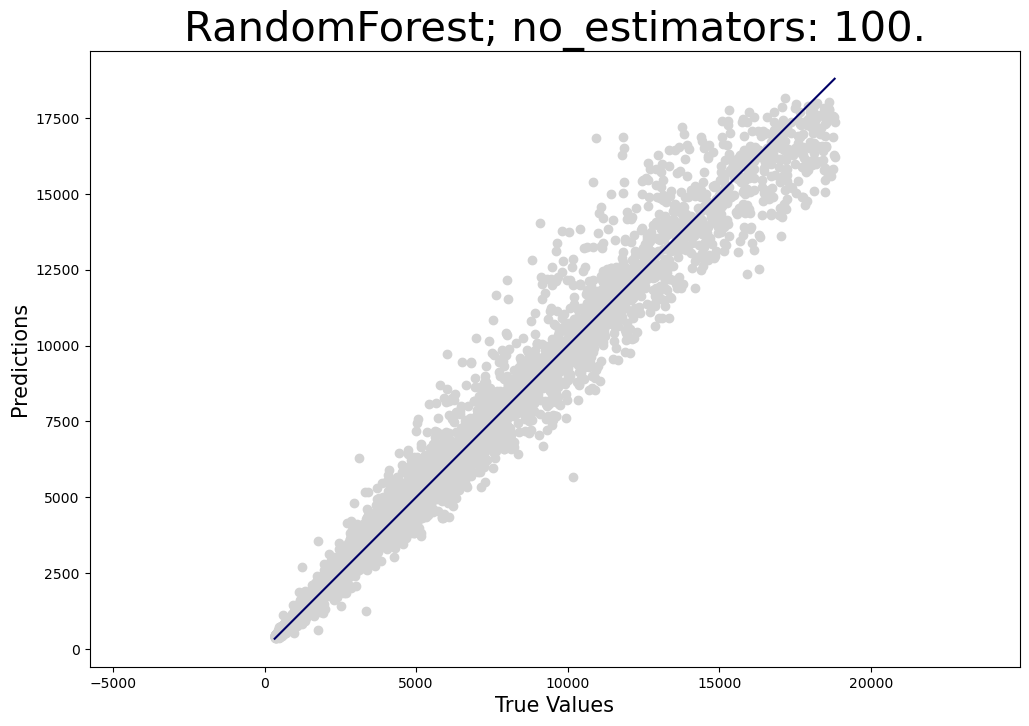

Model score:  0.9974215575358921
Cross validation scores:  [0.98075521 0.9794668  0.97911218]
Accuracy of model with Train data: 0.997
Accuracy of model with Test data: 0.982


--------------------------------------------------------------------------------------------------------------
Random Forest Model with 500 estimators)
--------------------------------------------------------------------------------------------------------------
Mean Absolute Error is 264.368

Mean Squared Error is 283196.740

Mean Absolute Percentage Error is 0.064

R Squared Error is 0.982



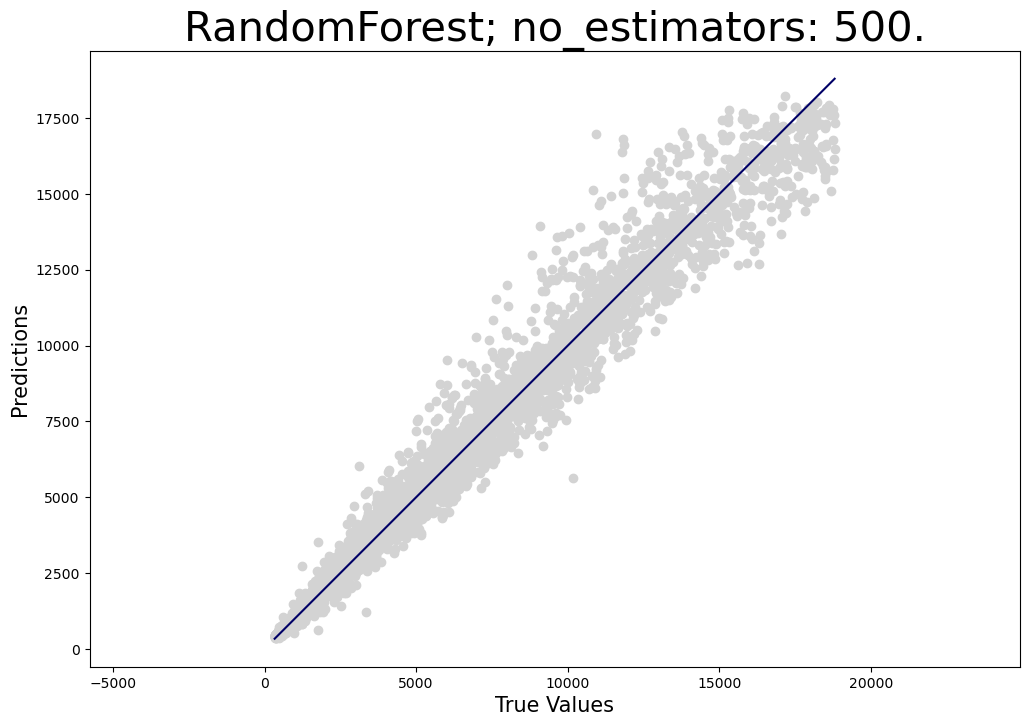

Model score:  0.997483547549113
Cross validation scores:  [0.98099342 0.97948748 0.9793322 ]
Accuracy of model with Train data: 0.997
Accuracy of model with Test data: 0.982




In [76]:

def evaluate_model(x_test=None,y_test=None,model=None,name='Linear Regression',color='red'):
    #1. make predictions
    #2. evaluate the model 
    #3. plot the regression line

    #Inputs:X_test,y_test, model object, model name

    predicted = model.predict(X_test)
    actual=y_test
    metric_scores(actual,predicted,name)
    plt.figure(figsize=(12,8))
    plt.scatter(actual, predicted, c=color)
    mxp,mxa,mnp,mna = max(predicted),max(actual),np.min(predicted),np.min(actual)
    p1 = mxp if mxp>mxa else mxa
    p2 = mnp if mnp<mna else mna
    plt.plot([p1, p2], [p1, p2],'#000066')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.title(name,fontsize=30)
    plt.axis('equal')
    plt.show()

d={}
def metric_scores(actual,predicted,name):
    # Evaluate and store the evaluation metric scores.
    # Inputs: y_test, y_pred, model name 

    mae = mean_absolute_error(actual,predicted)
    mse = mean_squared_error(actual,predicted)
    mape = mean_absolute_percentage_error(actual,predicted)
    r2 = r2_score(actual,predicted)

    d[name]=[mae,mse,mape,r2]

    print('Mean Absolute Error is {:.3f}'.format(mae))
    print()
    print('Mean Squared Error is {:.3f}'.format(mse))
    print()
    print('Mean Absolute Percentage Error is {:.3f}'.format(mape))
    print()
    print('R Squared Error is {:.3f}'.format(r2))
    print()

# Algorithmen intensiver testen -> Random forest.
for n_estimator in 5,10, 50, 100,500:
    print("--------------------------------------------------------------------------------------------------------------")
   
    print('Random Forest Model with {} estimators)'.format(n_estimator))
    print("--------------------------------------------------------------------------------------------------------------")
   
    model=RandomForestRegressor(n_estimators=n_estimator) #, verbose=4)
    model.fit(X_train, y_train)
    title = 'RandomForest; no_estimators: {}.'.format(np.round(n_estimator),3)
    evaluate_model(x_test=X_test,y_test=y_test,model=model,name=title,color='lightgray')
    cr_val_score=cross_val_score(model, X_train, y_train, cv=3)
    mod_score = model.score(X_train, y_train)
    print("Model score: ", mod_score)
    print("Cross validation scores: ",cr_val_score)
    print("Accuracy of model with Train data: {}".format(np.round(model.score(X_train, y_train),3)))
    print("Accuracy of model with Test data: {}".format(np.round(model.score(X_test, y_test),3)))
    print()
    print()

### RandomForest GridSearch

In [77]:

#Find best parameters for the model
parameters = {'max_depth': [7,50,100]
}

model=RandomForestRegressor(n_estimators=50)
model.fit(X_train, y_train)
gridforest = GridSearchCV(model, parameters, cv=3, scoring='neg_mean_squared_error', return_train_score=True, verbose=1)
gridforest.fit(X_train, y_train)
gridforest.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


{'max_depth': 50}

In [78]:
gridforest.best_estimator_

RandomForestRegressor(max_depth=50, n_estimators=50)

## Desicion Tree Model

In [82]:
# Decision Tree oberflächlich testen

dec_tree = DecisionTreeRegressor(max_depth=10, random_state=42)
dec_tree.fit(X_train, y_train)

# Prediction
ypred =  dec_tree.predict(X_train)

# Checking Accuracy
print(r2_score(y_train, ypred))

0.9810915286864138


In [83]:
max_dep = [6,7,8,9,10,11,12,13]
criterions = ['squared_error', 'friedman_mse',  'poisson'] # 'absolute_error'-> langsam
dep_score = []
index = 0
df_scores = pd.DataFrame(columns=["MaxDepth", "Criterion", "Score"])
for i in max_dep:
    for j in criterions:
        dec_tree = DecisionTreeRegressor(criterion =j, max_depth=i, random_state=42)
        dec_tree.fit(X_train, y_train)
        ypred2 =  dec_tree.predict(X_train)
        index += 1
        df_scores.loc[index] = [i , j, round(r2_score(y_train, ypred2),5)]

In [84]:
df_scores.sort_values(by=['Criterion','Score'], ascending=False)

MaxDepth      Criterion    Score
22        13  squared_error  0.98973
19        12  squared_error  0.98729
16        11  squared_error  0.98444
13        10  squared_error  0.98109
10         9  squared_error  0.97643
7          8  squared_error  0.96954
4          7  squared_error  0.95905
1          6  squared_error  0.94380
24        13        poisson  0.05855
21        12        poisson  0.03122
18        11        poisson  0.03067
15        10        poisson  0.02882
12         9        poisson  0.02730
9          8        poisson  0.02707
6          7        poisson  0.00477
3          6        poisson  0.00455
23        13   friedman_mse  0.98973
20        12   friedman_mse  0.98729
17        11   friedman_mse  0.98444
14        10   friedman_mse  0.98109
11         9   friedman_mse  0.97643
8          8   friedman_mse  0.96954
5          7   friedman_mse  0.95905
2          6   friedman_mse  0.94380

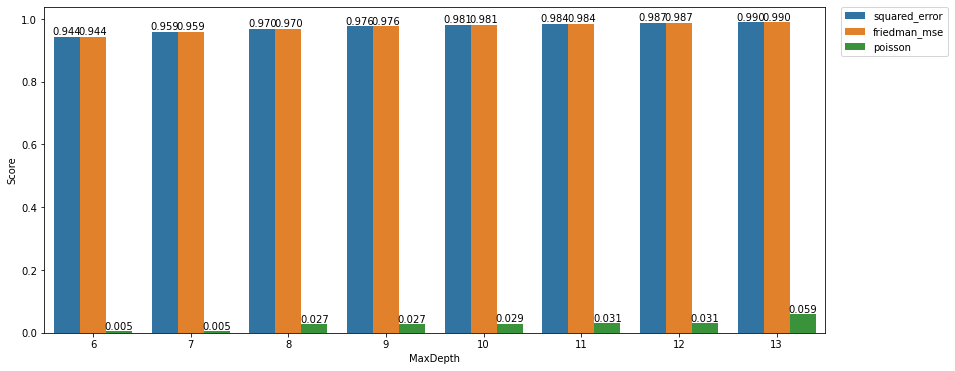

In [85]:
plt.figure(figsize=(14,6))
ax = sns.barplot(data=df_scores, x="MaxDepth", y="Score", hue="Criterion")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')

In [86]:
#from sklearn import tree
#tree.plot_tree(dec_tree)
# plt.figure(figsize=(12,8))

# tree.plot_tree(dec_tree.fit(X_train, y_train)) 

### Decision Tree - Cross Validation Score

In [112]:
cv = cross_val_score(dec_tree,X_train,y_train,cv=10)
print(cv)
print(cv.mean())

[0.16581553 0.06194403 0.08194805 0.10671123 0.10088196 0.04508648
 0.06806637 0.1379412  0.16374129 0.15103427]
0.10831704116762335


In [106]:
dt_scores = cross_val_score(dec_tree, X_train, y_train, cv = 5)
print("mean cross validation score: {}".format(np.mean(dt_scores)))
print("score without cv: {}".format(dec_tree.score(X_train_scaled, y_train)))

mean cross validation score: 0.18544944855237666
score without cv: -0.00038976166890702935


C:\Users\Lenovo Pc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [109]:
sc1 = MinMaxScaler()
X_train_minmaxscaled = sc1.fit_transform(X_train)
X_test_minmaxscaled = sc1.transform(X_test)

In [110]:
dt_scores = cross_val_score(dec_tree, X_train_minmaxscaled, y_train, cv = 5)
print("mean cross validation score: {}".format(np.mean(dt_scores)))
print("score without cv: {}".format(dec_tree.score(X_train_minmaxscaled, y_train)))

mean cross validation score: 0.18543871775868362
score without cv: -0.00038976166890702935


C:\Users\Lenovo Pc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [111]:
print("Testscores:DecisionTree\n",cross_validate(dec_tree,X_train_scaled,y_train,cv=4)["test_score"])
print("Feature_importance\n",dec_tree.feature_importances_,"Indizes der Größe nach geordnet",\
      np.argsort(dec.feature_importances_)[::-1])


NameError: name 'cross_validate' is not defined

## Model Fine-Tune - Gridsearch 

In [87]:

param_grid = [
    {'max_depth': [7,8,9,10,11,12,13], 
     'criterion': ['squared_error', 'friedman_mse',  'poisson'],
     "splitter": ["best","random"]
    }]

dectree_grids = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(dectree_grids, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid=[{'criterion': ['squared_error', 'friedman_mse',
                                        'poisson'],
                          'max_depth': [7, 8, 9, 10, 11, 12, 13],
                          'splitter': ['best', 'random']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [88]:
grid_search.best_params_

{'criterion': 'squared_error', 'max_depth': 11, 'splitter': 'best'}

In [89]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=11, random_state=42)

In [90]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

811.0572886483088 {'criterion': 'squared_error', 'max_depth': 7, 'splitter': 'best'}
1131.698211621473 {'criterion': 'squared_error', 'max_depth': 7, 'splitter': 'random'}
730.6535063089166 {'criterion': 'squared_error', 'max_depth': 8, 'splitter': 'best'}
1021.6581293356352 {'criterion': 'squared_error', 'max_depth': 8, 'splitter': 'random'}
673.7826665869636 {'criterion': 'squared_error', 'max_depth': 9, 'splitter': 'best'}
964.3877903436752 {'criterion': 'squared_error', 'max_depth': 9, 'splitter': 'random'}
644.6286605209438 {'criterion': 'squared_error', 'max_depth': 10, 'splitter': 'best'}
861.3205161895442 {'criterion': 'squared_error', 'max_depth': 10, 'splitter': 'random'}
638.0447230693967 {'criterion': 'squared_error', 'max_depth': 11, 'splitter': 'best'}
780.1462721761052 {'criterion': 'squared_error', 'max_depth': 11, 'splitter': 'random'}
643.4921391633038 {'criterion': 'squared_error', 'max_depth': 12, 'splitter': 'best'}
728.101186016237 {'criterion': 'squared_error', '

In [91]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.089364      0.009845         0.005397    2.243710e-03   
1        0.023988      0.002184         0.002603    4.889955e-04   
2        0.139721      0.045603         0.005397    1.200176e-03   
3        0.026581      0.001352         0.003406    8.042006e-04   
4        0.099343      0.005155         0.003998    1.414724e-03   
5        0.028981      0.002190         0.003611    5.005209e-04   
6        0.109337      0.004957         0.003603    4.894183e-04   
7        0.034980      0.002100         0.003397    7.990080e-04   
8        0.118730      0.005565         0.003798    7.483290e-04   
9        0.037576      0.002053         0.003404    4.887692e-04   
10       0.127083      0.002212         0.004198    1.599479e-03   
11       0.042977      0.002186         0.003998    8.947898e-04   
12       0.152021      0.024129         0.004398    7.952772e-04   
13       0.044976      0.001999         0.003801    4.009626e-04   
14       0.092893      0.011396         0.004794    2.136106e-03   
15       0.027782      0.002787         0.003799    4.001009e-04   
16       0.083951      0.002823         0.002996    3.707696e-06   
17       0.027584      0.002240         0.003197    7.482559e-04   
18       0.100543      0.002416         0.003598    7.976984e-04   
19       0.031739      0.002135         0.003002    7.129314e-06   
20       0.108540      0.003263         0.003994    6.352907e-04   
21       0.037982      0.009565         0.003597    7.950186e-04   
22       0.126038      0.012511         0.003596    7.983635e-04   
23       0.036987      0.001673         0.002999    5.001110e-07   
24       0.130464      0.009045         0.003400    4.929116e-04   
25       0.041181      0.003544         0.003800    7.477316e-04   
26       0.139837      0.006596         0.004197    9.821877e-04   
27       0.044173      0.001937         0.004196    7.436694e-04   
28       0.085059      0.002472         0.003001    6.321192e-04   
29       0.030783      0.002036         0.003602    7.979204e-04   
30       0.094347      0.003080         0.003997    6.346758e-04   
31       0.032930      0.002096         0.003199    3.984643e-04   
32       0.108139      0.006173         0.002798    3.998215e-04   
33       0.037578      0.001356         0.003398    7.951596e-04   
34       0.120049      0.003682         0.003597    7.965835e-04   
35       0.041776      0.001466         0.003003    6.297731e-04   
36       0.149646      0.017283         0.004800    1.937423e-03   
37       0.055164      0.007048         0.004597    1.199262e-03   
38       0.185449      0.036534         0.005396    1.357220e-03   
39       0.052167      0.004278         0.003596    8.000552e-04   
40       0.175851      0.013310         0.004794    7.465706e-04   
41       0.056770      0.001938         0.003999    6.321905e-04   

   param_criterion param_max_depth param_splitter  \
0    squared_error               7           best   
1    squared_error               7         random   
2    squared_error               8           best   
3    squared_error               8         random   
4    squared_error               9           best   
5    squared_error               9         random   
6    squared_error              10           best   
7    squared_error              10         random   
8    squared_error              11           best   
9    squared_error              11         random   
10   squared_error              12           best   
11   squared_error              12         random   
12   squared_error              13           best   
13   squared_error              13         random   
14    friedman_mse               7           best   
15    friedman_mse               7         random   
16    friedman_mse               8           best   
17    friedman_mse               8         random   
18    friedman_mse               9           best   
19    friedman_mse 

### System Testen mit dem Testset

In [92]:
dec_tree_test = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 11, splitter = 'best', random_state=42)
dec_tree_test.fit(X_train, y_train)

# Prediction
ypred_test =  dec_tree_test.predict(X_test)

# Checking Accuracy

print(r2_score(y_test, ypred_test))

0.9753692521734955


**<span style="color:#65634a;">Danke!</span>**
<a id="5"></a> 
# <h1 style='background:#00B0F0; border:0; color:black'><center>VOTING</center></h1> 

**Die Scores der Modelle sind:**<br>
**Random Forest:**<br>
Accuracy of model with Test data: 0.982<br>
****Linear Regression:**
Accuracy of model with Test data: 0.8931<br>
**Linear Regression Ridge:**<br>
Accuracy of model with Test data: 0.8928<br>
**Linear Regression Lasso:**<br>
Accuracy of model with Test data: 0.8918<br>
**Decisioan Tree Regression:**<br>
Accuracy of model with Test data: 0.975<br>


**Auf der Grundlage dieser Daten ist das beste Modell Decision Tree.
Lineare Regressionsmodelle schneiden nicht sehr gut ab und das Random Forest Modell ist Overtfitted.**

**<span style="color:#65634a;">Danke!</span>**

<a id="5"></a> 
# <h1 style='background:#00B0F0; border:0; color:black'><center>ENDE</center></h1> 